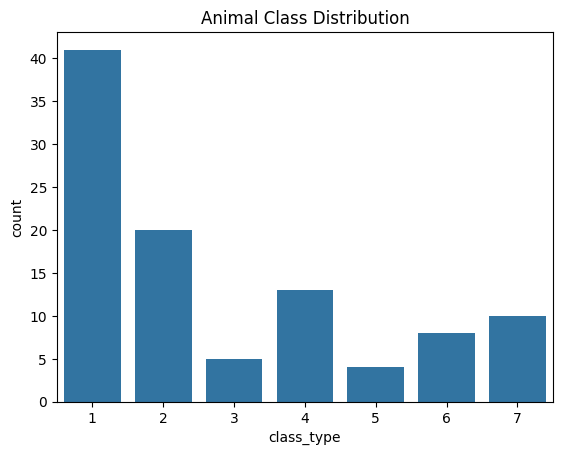

Accuracy: 0.9523809523809523


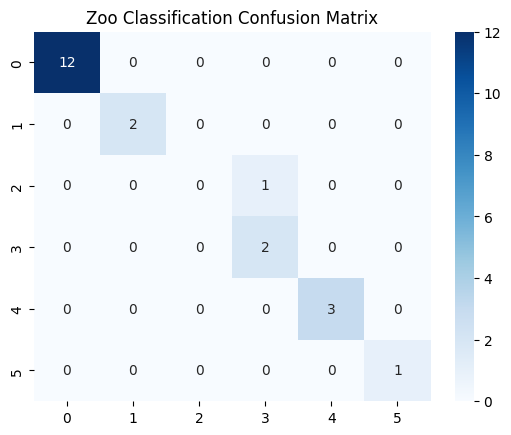

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

# Column names
columns = [
    "animal_name","hair","feathers","eggs","milk","airborne","aquatic",
    "predator","toothed","backbone","breathes","venomous","fins",
    "legs","tail","domestic","catsize","class_type"
]

# Load data
df = pd.read_csv("zoo.data", header=None, names=columns)

# Drop animal name
df.drop("animal_name", axis=1, inplace=True)

# EDA
sns.countplot(x="class_type", data=df)
plt.title("Animal Class Distribution")
plt.show()

# Features and target
X = df.drop("class_type", axis=1)
y = df["class_type"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Model
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
pred = rf.predict(X_test)

print("Accuracy:", accuracy_score(y_test, pred))

# Confusion matrix
sns.heatmap(confusion_matrix(y_test, pred), annot=True, cmap="Blues")
plt.title("Zoo Classification Confusion Matrix")
plt.show()


/tmp/ipython-input-1581961408.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


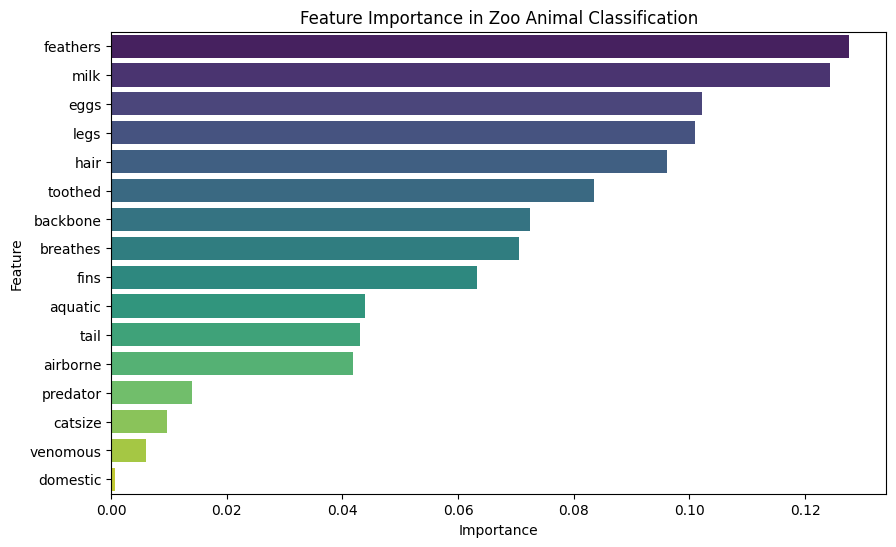

In [2]:
# ================= FEATURE IMPORTANCE =================
importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance_df,
    palette="viridis"
)
plt.title("Feature Importance in Zoo Animal Classification")
plt.show()


In [3]:
from sklearn.model_selection import cross_val_score

cv_scores = cross_val_score(rf, X, y, cv=5)

print("Cross-validation scores:", cv_scores)
print("Mean CV Accuracy:", cv_scores.mean())


/usr/local/lib/python3.12/dist-packages/sklearn/model_selection/_split.py:805: UserWarning: The least populated class in y has only 4 members, which is less than n_splits=5.
  warnings.warn(


Cross-validation scores: [1.   0.95 0.95 1.   0.95]
Mean CV Accuracy: 0.97


/tmp/ipython-input-1581961408.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


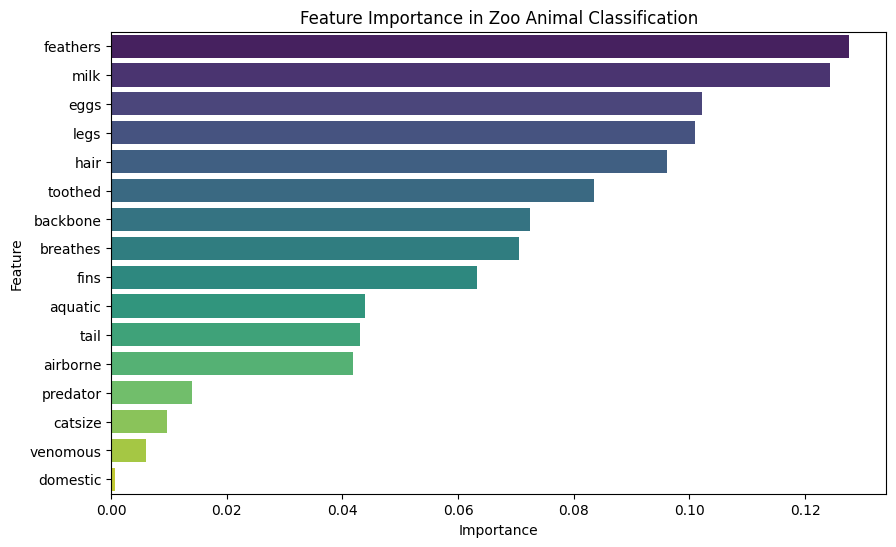

In [4]:
# ================= FEATURE IMPORTANCE =================
importances = rf.feature_importances_

feature_importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": importances
}).sort_values(by="Importance", ascending=False)

# Plot feature importance
plt.figure(figsize=(10,6))
sns.barplot(
    x="Importance",
    y="Feature",
    data=feature_importance_df,
    palette="viridis"
)
plt.title("Feature Importance in Zoo Animal Classification")
plt.show()
